# Malignant Comment Classifier

# Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

# Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import re
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Display all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
train=pd.read_csv('train_mali.csv')
train.head(25)

id                                       comment_text  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
13  0006f16e4e9f292e  Before you start throwing accusations and warn...   
14  00070ef96486d6f9  Oh, and the girl above started her arguments w...   
15  00078f8ce7eb276d  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...   
16  0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
17  000897889268bc93   REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski   
18  0009801bd85e5806  The Mitsurugi point made no sense - why not ar...   
19  0009eaea3325de8c  Don't mean to bother you \n\nI see that you're...   
20  000b08c464718505  "\n\n Regarding your recent edits \n\nOnce aga...   
21  000bfd0867774845  "\nGood to know. About me, yeah, I'm studying ...   
22  000c0dfd995809fa  "\n\n Snowflakes are NOT always symmetrical! \...   
23  000c6a3f0cd3ba8e  "\n\n The Signpost: 24 September 2012 \n\n Rea...   
24  000cfee90f50d471  "\n\nRe-considering 1st paragraph edit?\nI don...   

    malignant  highly_malignant  rude  threat  abuse  loathe  
0           0                 0     0       0      0       0  
1           0                 0     0       0      0       0  
2           0                 0     0       0      0       0  
3           0                 0     0       0      0       0  
4           0                 0     0       0      0       0  
5           0                 0     0       0      0       0  
6           1                 1     1       0      1       0  
7           0                 0     0       0      0       0  
8           0                 0     0       0      0       0  
9           0                 0     0       0      0       0  
10          0                 0     0       0      0       0  
11          0                 0     0       0      0       0  
12          1                 0     0       0      0       0  
13          0                 0     0       0      0       0  
14          0                 0     0       0      0       0  
15          0                 0     0       0      0       0  
16          1                 0     0       0      0       0  
17          0                 0     0       0      0       0  
18          0                 0     0       0      0       0  
19          0                 0     0       0      0       0  
20          0                 0     0       0      0       0  
21          0                 0     0       0      0       0  
22          0                 0     0       0      0       0  
23          0                 0     0       0      0       0  
24          0                 0     0       0      0       0

In [4]:
test=pd.read_csv('test_mali.csv')
test.head(25)

id                                       comment_text
0   00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1   0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2   00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3   00017563c3f7919a  :If you have a look back at the source, the in...
4   00017695ad8997eb          I don't anonymously edit articles at all.
5   0001ea8717f6de06  Thank you for understanding. I think very high...
6   00024115d4cbde0f  Please do not add nonsense to Wikipedia. Such ...
7   000247e83dcc1211                   :Dear god this site is horrible.
8   00025358d4737918  " \n Only a fool can believe in such numbers. ...
9   00026d1092fe71cc  == Double Redirects == \n\n When fixing double...
10  0002eadc3b301559  I think its crap that the link to roggenbier i...
11  0002f87b16116a7f  "::: Somebody will invariably try to add Relig...
12  0003806b11932181  , 25 February 2010 (UTC) \n\n :::Looking it ov...
13  0003e1cccfd5a40a  " \n\n It says it right there that it IS a typ...
14  00059ace3e3e9a53  " \n\n == Before adding a new product to the l...
15  000634272d0d44eb  ==Current Position== \n Anyone have confirmati...
16  000663aff0fffc80                           this other one from 1897
17  000689dd34e20979  == Reason for banning throwing == \n\n This ar...
18  000834769115370c  :: Wallamoose was changing the cited material ...
19  000844b52dee5f3f             |blocked]] from editing Wikipedia.   |
20  00084da5d4ead7aa  ==Indefinitely blocked== \n I have indefinitel...
21  00091c35fa9d0465  == Arabs are committing genocide in Iraq, but ...
22  000968ce11f5ee34  Please stop. If you continue to vandalize Wiki...
23  0009734200a85047  == Energy  == \n\n I have edited the introduct...
24  00097b6214686db5  :yeah, thanks for reviving the tradition of pi...

In [5]:
train.shape

(159571, 8)

In [6]:
test.shape

(153164, 2)

In [7]:
#Checking the information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
#Checking the information of the dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
#Checking the missing values in the dataset
train.isnull().values.any()

False

In [10]:
#Checking the missing values in columns
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

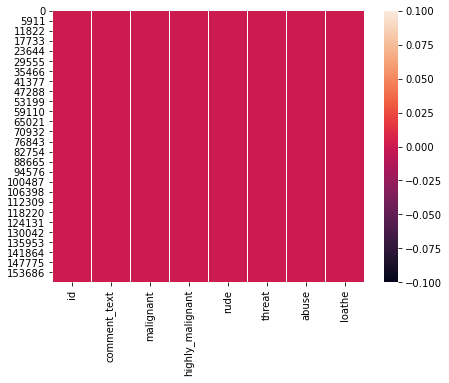

In [11]:
# Checking for null values
plt.figure(figsize=(7,5))
sns.heatmap(train.isnull())
plt.show()

In [12]:
#summary statistics
train.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [13]:
# Checking the summary of object columns
train.describe(include=['object'])

id                                       comment_text
count             159571                                             159571
unique            159571                                             159571
top     8c459252cc4e97c1  Wikipedia:Articles for deletion/Nahum Zewdie \...
freq                   1                                                  1

In [14]:
#Printing the object data types and their unique values

for column in train.columns:
    if train[column].dtype==object:
        print("Seeing the Object features\n")
        print(str(column) + ' : ' + str(train[column].nunique()))
        print('*********************************************************') 
    if train[column].dtype=='int64':
        print("Seeing the Interger features\n")
        print(str(column) + ' : ' + str(train[column].nunique()))
        print("Unique Values:",train[column].unique())
        print('**********************************************************')

Seeing the Object features

id : 159571
*********************************************************
Seeing the Object features

comment_text : 159571
*********************************************************
Seeing the Interger features

malignant : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

highly_malignant : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

rude : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

threat : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

abuse : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

loathe : 2
Unique Values: [0 1]
**********************************************************


In [15]:
#Seeing the correlation
train.corr()

malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000

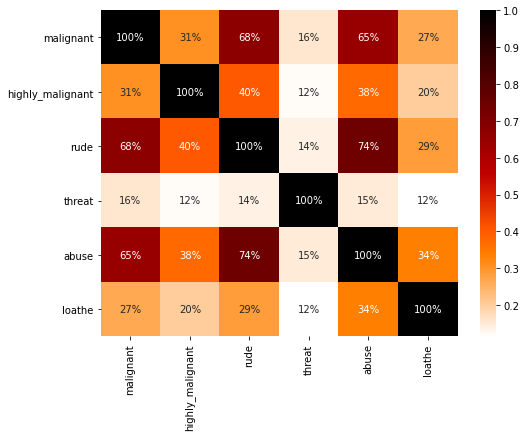

In [16]:
#Seeing the correlation via visualization
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),annot=True,fmt='.0%',cmap='gist_heat_r')
plt.show()

<Figure size 1440x576 with 0 Axes>

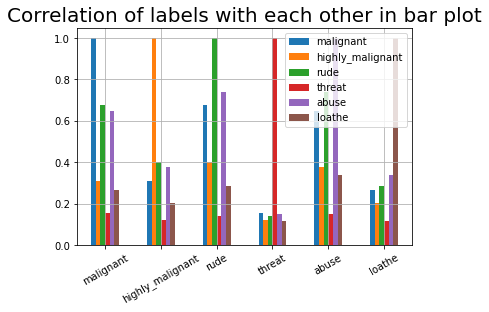

In [17]:
#Checking the correlation of labels in bar plot
plt.figure(figsize=(20,8))
train.corr(method='pearson').plot(kind='bar',grid=True)
plt.xticks(rotation='30')
plt.title("Correlation of labels with each other in bar plot",fontsize=20)
plt.show()

In [18]:
col=['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

Counting of labels for: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



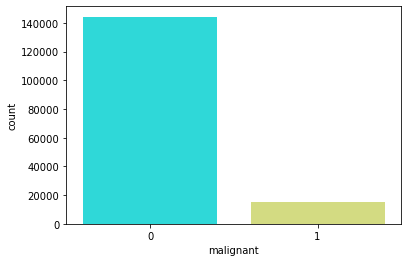

Counting of labels for: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



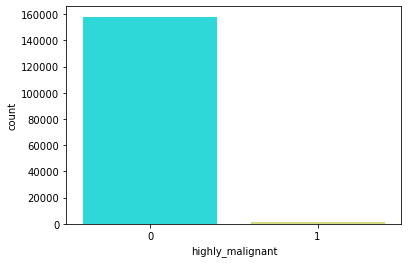

Counting of labels for: rude
0    151122
1      8449
Name: rude, dtype: int64 



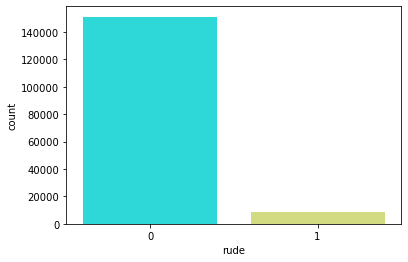

Counting of labels for: threat
0    159093
1       478
Name: threat, dtype: int64 



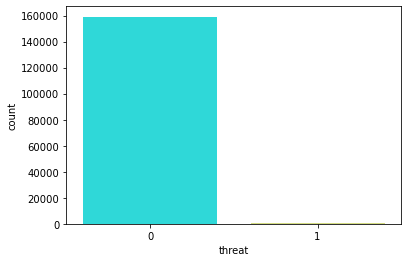

Counting of labels for: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



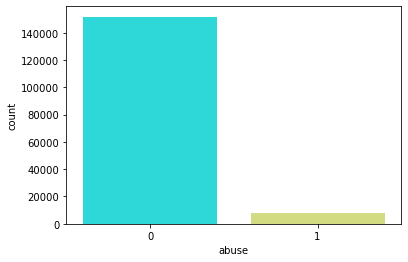

Counting of labels for: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



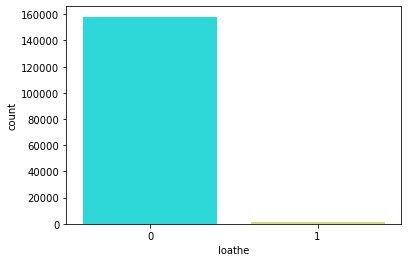

In [19]:
for i in col:
    print("Counting of labels for:", i)
    sns.countplot(train[i],palette='rainbow',saturation=0.95)
    print(train[i].value_counts(),'\n')
    plt.show()

In [20]:
#New column for length of comment
train['length']=train.comment_text.str.len()
train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  
0          0                 0     0       0      0       0     264  
1          0                 0     0       0      0       0     112  
2          0                 0     0       0      0       0     233  
3          0                 0     0       0      0       0     622  
4          0                 0     0       0      0       0      67

In [21]:
#converting all message to lower case
train['comment_text']=train['comment_text'].str.lower()

In [22]:
#Replace email address with 'email'
train['comment_text']=train['comment_text'].str.replace(r'^.+@[^\.].*\[a-z]{2,}$','emailaddress')
#Replace URLs with 'webaddress'
train['comment_text']=train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')
#Replace money symbol with 'moneysymb'(£ can type with ALT key+156)
train['comment_text']=train['comment_text'].str.replace(r'£|\$','dollers')
#Replace 10 digit phone number(format include paranthesis, space, no spaces,dashes) with 'phone number'
train['comment_text']=train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replace number with 'numbr'
train['comment_text']=train['comment_text'].str.replace(r'^\d+(\.\d+)?','numbr')

In [23]:
#Remove punctuation
train['comment_text']=train['comment_text'].str.replace(r'[^\w\d\s]',' ')
#replace whitespace between terms with a single space
train['comment_text']=train['comment_text'].str.replace(r'\s+',' ')
#remove leading and trailing whitespace
train['comment_text']=train['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [24]:
#remove stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train['comment_text']=train['comment_text'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [25]:
train['clean_length']=train.comment_text.str.len()
train.head()

id                                       comment_text  \
0  0000997932d777bf  explanation edits made username hardcore metal...   
1  000103f0d9cfb60f  aww matches background colour seemingly stuck ...   
2  000113f07ec002fd  hey man really trying edit war guy constantly ...   
3  0001b41b1c6bb37e  make real suggestions improvement wondered sec...   
4  0001d958c54c6e35                      sir hero chance remember page   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  \
0          0                 0     0       0      0       0     264   
1          0                 0     0       0      0       0     112   
2          0                 0     0       0      0       0     233   
3          0                 0     0       0      0       0     622   
4          0                 0     0       0      0       0      67   

   clean_length  
0           171  
1            83  
2           141  
3           374  
4            29

In [26]:
#Total length removal
print('Original Length',train.length.sum())
print('Clean Length',train.clean_length.sum())

Original Length 62893130
Clean Length 40108283


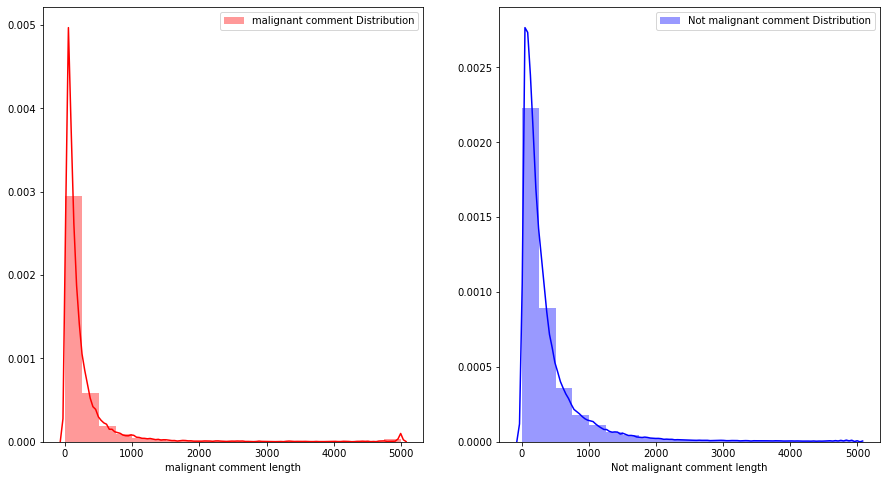

In [27]:
#comment distribution Before cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(train[train['malignant']==1]['length'],bins=20,ax=ax[0],label='malignant comment Distribution',color='r')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()
sns.distplot(train[train['malignant']==0]['length'],bins=20,ax=ax[1],label='Not malignant comment Distribution',color='b')
ax[1].set_xlabel('Not malignant comment length')
ax[1].legend()
plt.show()

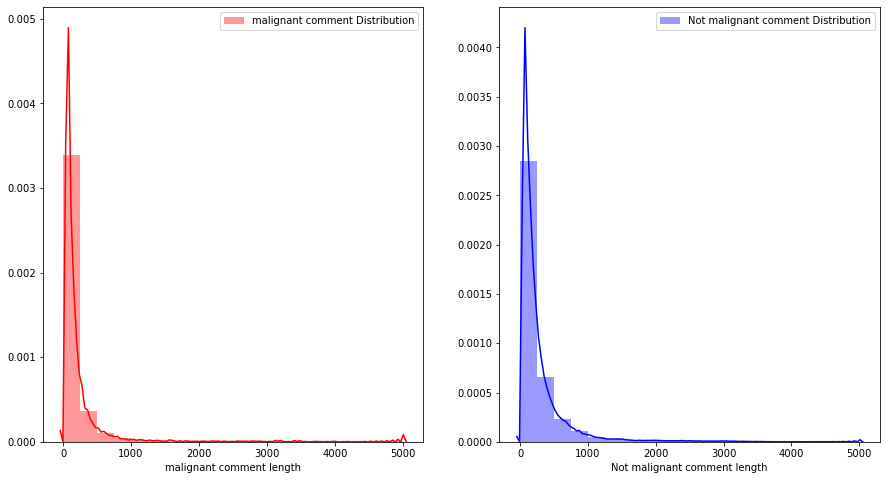

In [28]:
#comment distribution After cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(train[train['malignant']==1]['clean_length'],bins=20,ax=ax[0],label='malignant comment Distribution',color='r')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()
sns.distplot(train[train['malignant']==0]['clean_length'],bins=20,ax=ax[1],label='Not malignant comment Distribution',color='b')
ax[1].set_xlabel('Not malignant comment length')
ax[1].legend()
plt.show()

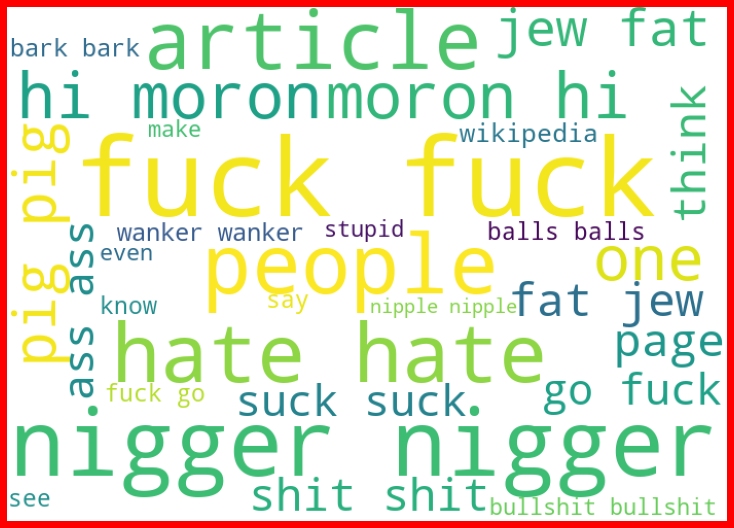

In [29]:
#getting sense of loud word in malignant
from wordcloud import WordCloud

malignant=train['comment_text'][train['malignant']==1]

malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

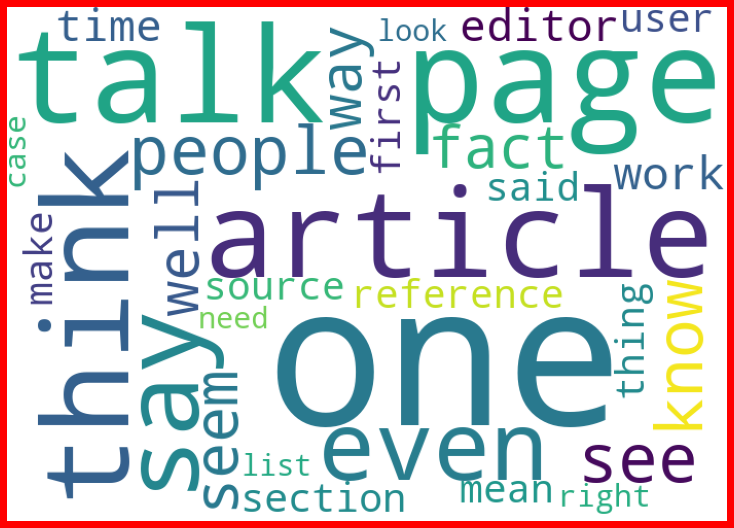

In [30]:
#getting sense of loud word in Not malignant
from wordcloud import WordCloud

not_malignant=train['comment_text'][train['malignant']==0]

not_malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(not_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution =train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [32]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [33]:
#Importing Library to apply algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

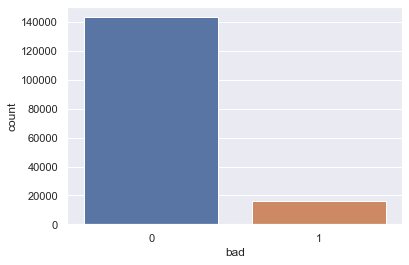

In [34]:
sns.set()
sns.countplot(x='bad',data = train)
plt.show()

In [35]:
#Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features =10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x=features

In [36]:
train.shape

(159571, 11)

In [37]:
test.shape

(153164, 2)

In [38]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [39]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [40]:
#LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train,y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9596057261031881
Test accuracy is 0.9553392379679144
[[42737   213]
 [ 1925  2997]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.95      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [41]:
#DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988988263099938
Test accuracy is 0.9402991310160428
[[41626  1324]
 [ 1534  3388]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872



In [42]:
#RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.9562165775401069
[[42384   566]
 [ 1530  3392]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42950
           1       0.86      0.69      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.84      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [43]:
#AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train,y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9507336681617562
Test accuracy is 0.9486338569518716
[[42557   393]
 [ 2066  2856]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [44]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9206259680032945
Test accuracy is 0.9157962901069518
[[42796   154]
 [ 3877  1045]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.87      0.21      0.34      4922

    accuracy                           0.92     47872
   macro avg       0.89      0.60      0.65     47872
weighted avg       0.91      0.92      0.89     47872



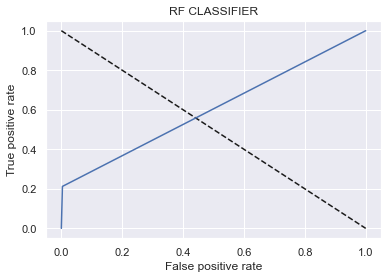

In [45]:
#Plotting the graph which tells us about the area under curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [46]:
#from sklearn.externals 
import joblib
joblib.dump(RF,'Malignant_Comment_Classifier_Model.pkl')

['Malignant_Comment_Classifier_Model.pkl']

In [47]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940213 stored elements in Compressed Sparse Row format>

In [48]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
model=joblib.load('Malignant_Comment_Classifier_Model.pkl')

In [50]:
result1=pd.DataFrame(model.predict(test_data))

In [51]:
result1.to_csv('Malignant_Comment_Classifier_Model_prdictresults.csv')